In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP

In [3]:
from sklearn.datasets import make_moons, make_blobs

In [4]:
np.random.seed(1337)
random.seed(1337)

In [5]:
X, y = make_moons(n_samples=100, noise=0.1)

In [6]:
y = y*2 -1

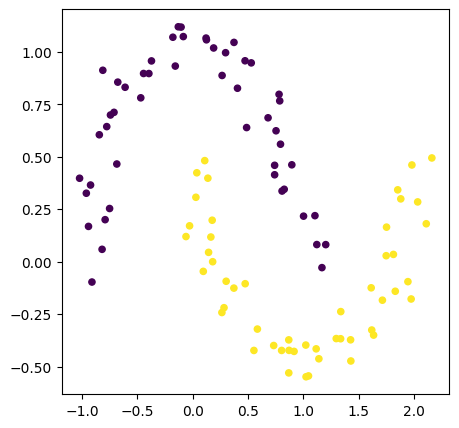

In [7]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],c=y, s=20)

In [8]:
model = MLP(2, [16,16,1]) # 2-layers neural network

In [9]:
print(model)

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)], Layer of [LinearNeuron(16)]]


In [10]:
print(f"model has {len(model.parameters())} params")

model has 337 params


In [11]:
# loss function
def loss(batch_size=None):
    
#     inline dataloader
    if batch_size is None:
        xB, yB = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        xB, yB = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in xB]
    
#     forward model to get scores
    scores = list(map(model, inputs))
    
#     svm max-margin loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yB, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    
#     l2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
#     get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yB, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.8958441028683222, grad=0) 0.5


In [12]:
# optimization
for k in range(100):
    
#     forward
    total_loss, acc = loss()
    
#     backward
    model.zero_grad()
    total_loss.backward()
    
#     update
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
        
    if k % 1 == 0:
        print(f"step {k} loss: {total_loss.data}, accuracy: {acc*100}%")

step 0 loss: 0.8958441028683222, accuracy: 50.0%
step 1 loss: 1.7235905336972022, accuracy: 81.0%
step 2 loss: 0.742900631385113, accuracy: 77.0%
step 3 loss: 0.7705641260584201, accuracy: 82.0%
step 4 loss: 0.3692793385976538, accuracy: 84.0%
step 5 loss: 0.313545481918522, accuracy: 86.0%
step 6 loss: 0.2814234349772434, accuracy: 89.0%
step 7 loss: 0.26888733313983904, accuracy: 91.0%
step 8 loss: 0.25671472860574157, accuracy: 91.0%
step 9 loss: 0.27048625516379227, accuracy: 91.0%
step 10 loss: 0.2450702385365803, accuracy: 91.0%
step 11 loss: 0.25099055297915035, accuracy: 92.0%
step 12 loss: 0.21560951851922944, accuracy: 91.0%
step 13 loss: 0.23090378446402732, accuracy: 93.0%
step 14 loss: 0.20152151227899434, accuracy: 92.0%
step 15 loss: 0.22574506279282233, accuracy: 93.0%
step 16 loss: 0.19447987596204103, accuracy: 92.0%
step 17 loss: 0.21089496199246366, accuracy: 93.0%
step 18 loss: 0.15983077356303593, accuracy: 94.0%
step 19 loss: 0.18453748746883927, accuracy: 93.0%


(-1.548639298268643, 1.951360701731357)

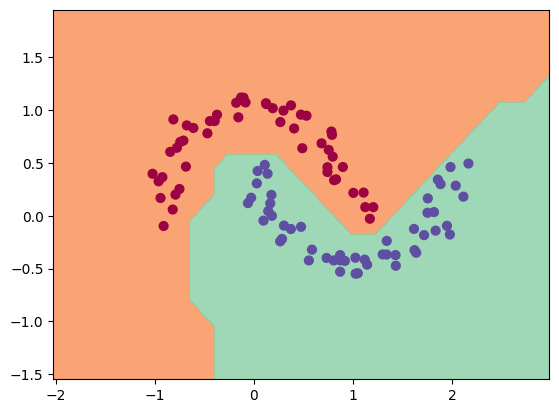

In [13]:
# visualize decision boundary
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

xMesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in xMesh]

scores = list(map(model, inputs))

Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())